In [1]:
!pip install /Users/johnmount/Documents/work/pyvtreat/pkg/dist/vtreat-0.2.tar.gz
#!pip install https://github.com/WinVector/pyvtreat/raw/master/pkg/dist/vtreat-0.2.tar.gz

Processing /Users/johnmount/Documents/work/pyvtreat/pkg/dist/vtreat-0.2.tar.gz
  Stored in directory: /Users/johnmount/Library/Caches/pip/wheels/4e/08/8e/b5002ac5b5bab82c827ea36eb09ec56c7dc8db2f3dbc435796
Successfully built vtreat
  Found existing installation: vtreat 0.2
    Uninstalling vtreat-0.2:
      Successfully uninstalled vtreat-0.2


In [56]:
import pygam
import pandas
import numpy
import numpy.random
import vtreat
import vtreat.transform

In [32]:
class GAMTransform(vtreat.transform.UserTransform):
    """a gam model"""
    def __init__(self, incoming_column_name):
        vtreat.transform.UserTransform.__init__(self,
                                                incoming_column_name = incoming_column_name,
                                                derived_column_names = [ incoming_column_name + "_gam"],
                                                treatment = "gam")
        self.model_ = None

    def fit(self, X, y):
        self.model_ = pygam.LinearGAM().fit(X[[self.incoming_column_name_]], y)
        return self
        
    def transform(self, X):
        res = pandas.DataFrame({self.derived_column_names_[0]:self.model_.predict(X[self.incoming_column_name_])})
        return res

In [58]:
d = pandas.DataFrame({'x':[i for i in range(100)]})
d['y'] = numpy.sin(0.2*d['x']) + 0.1*numpy.random.normal(size=d.shape[0])
d.head()

,x,y
0,0,-0.034688
1,1,0.254171
2,2,0.383314
3,3,0.578984
4,4,0.843659


In [59]:
step = GAMTransform('x')

In [60]:
fit = step.fit_transform(d, d['y'])
fit.head()

,x_gam
0,0.302877
1,0.410735
2,0.511442
3,0.601617
4,0.677879


In [61]:
fit.columns = ['y']
fit['x'] = d['x']
fit['curve'] = 'fit'
d['curve'] = 'y'
plt = pandas.concat([d, fit], axis=0)
plt.head()

,curve,x,y
0,y,0,-0.034688
1,y,1,0.254171
2,y,2,0.383314
3,y,3,0.578984
4,y,4,0.843659


In [62]:
import seaborn

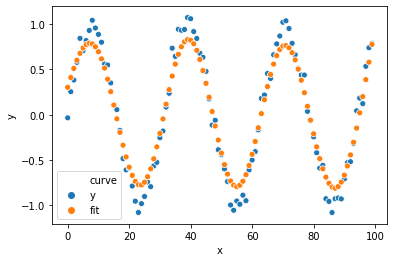

In [63]:
seaborn.scatterplot(x='x', y='y', hue='curve', data=plt)